In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.24/06


In [3]:
file = ROOT.TFile("mu3e_run_000134_sorted_truth.root")
ttree_mu3e = file.Get("mu3e")
ttree_mu3e_mc = file.Get("mu3e_mchits")

In [4]:
cluster_distribution_upstream = np.zeros((7,7))

In [6]:
cluster_dist_tmp = []

In [7]:
for frame in range(ttree_mu3e.GetEntries()):
    ttree_mu3e.GetEntry(frame)
    #tilehits = ttree_mu3e.tilehit_tile
    #tilehits_primaries = ttree_mu3e.tilehit_primary
    
    indices = np.argsort(list(ttree_mu3e.tilehit_primary))
    tilehit_ids = np.asarray(list(ttree_mu3e.tilehit_tile))[indices]
    tilehit_primaries = np.asarray(list(ttree_mu3e.tilehit_primary))[indices]
    tilehit_mc_i = np.asarray(list(ttree_mu3e.tilehit_mc_i))[indices]
    
    tilehit_hid = []
    for i in range(len(tilehit_mc_i)):
        mc_i = tilehit_mc_i[i]
        ttree_mu3e_mc.GetEntry(mc_i)
        tilehit_hid.append(ttree_mu3e_mc.hid)
    tilehit_hid = np.asarray(tilehit_hid)
    
    
    
    
    
    
    
    
    if len(tilehit_primaries) == 0:
        continue
        
    single_events = {}

    tmp_primary_reference = tilehit_primaries[0]
    index_start_track = 0
    for index in range(len(tilehit_ids)):
        if tilehit_primaries[index] != tmp_primary_reference:
            single_events[index] = [tilehit_ids[index_start_track:index], tilehit_hid[index_start_track:index]]
            index_start_track = index
            tmp_primary_reference = tilehit_primaries[index]

    # fill up remaining event
    if index_start_track != len(tilehit_ids):
        single_events[len(tilehit_ids)] = [tilehit_ids[index_start_track:], tilehit_hid[index_start_track:]]

    # delete entries with only one hit
    keys_to_delete = []
    for key in single_events:
        if len(single_events[key][0]) == 1:
            keys_to_delete.append(key)
        elif any(single_events[key][0] < 300000):
            keys_to_delete.append(key)

    for key in keys_to_delete:
        del single_events[key]

    for entry in single_events:
        indices = np.argsort(single_events[entry][1])
        single_events[entry][0] = single_events[entry][0][indices]
        single_events[entry][1] = single_events[entry][1][indices]


        single_events[entry][0] -= single_events[entry][0][0]
        cluster_dist_tmp += list(single_events[entry][0])

In [8]:
cluster_distribution_upstream = np.zeros((7,7))
for hit in cluster_dist_tmp:
    if hit == 0:
        cluster_distribution_upstream[3][3] += 1
    elif hit == 1:
        cluster_distribution_upstream[2][3] += 1
    elif hit == 2:
        cluster_distribution_upstream[1][3] += 1
    elif hit == 3:
        cluster_distribution_upstream[0][3] += 1
    elif hit == -1:
        cluster_distribution_upstream[4][3] += 1
    elif hit == -2:
        cluster_distribution_upstream[5][3] += 1
    elif hit == -3:
        cluster_distribution_upstream[6][3] += 1

        
    elif hit == 56:
        cluster_distribution_upstream[3][4] += 1
    elif hit == 57:
        cluster_distribution_upstream[2][4] += 1
    elif hit == 58:
        cluster_distribution_upstream[1][4] += 1
    elif hit == 59:
        cluster_distribution_upstream[0][4] += 1
    elif hit == 55:
        cluster_distribution_upstream[4][4] += 1
    elif hit == 54:
        cluster_distribution_upstream[5][4] += 1
    elif hit == 53:
        cluster_distribution_upstream[6][4] += 1
        
    elif hit == 56+56:
        cluster_distribution_upstream[3][5] += 1
    elif hit == 57+56:
        cluster_distribution_upstream[2][5] += 1
    elif hit == 58+56:
        cluster_distribution_upstream[1][5] += 1
    elif hit == 59+56:
        cluster_distribution_upstream[0][5] += 1
    elif hit == 55+56:
        cluster_distribution_upstream[4][5] += 1
    elif hit == 54+56:
        cluster_distribution_upstream[5][5] += 1
    elif hit == 53+56:
        cluster_distribution_upstream[6][5] += 1

    elif hit == 56+2*56:
        cluster_distribution_upstream[3][6] += 1
    elif hit == 57+2*56:
        cluster_distribution_upstream[2][6] += 1
    elif hit == 58+2*56:
        cluster_distribution_upstream[1][6] += 1
    elif hit == 59+2*56:
        cluster_distribution_upstream[0][6] += 1
    elif hit == 55+2*56:
        cluster_distribution_upstream[4][6] += 1
    elif hit == 54+2*56:
        cluster_distribution_upstream[5][6] += 1
    elif hit == 53+2*56:
        cluster_distribution_upstream[6][6] += 1
        
    if hit == 0-56:
        cluster_distribution_upstream[3][2] += 1
    elif hit == 1-56:
        cluster_distribution_upstream[2][2] += 1
    elif hit == 2-56:
        cluster_distribution_upstream[1][2] += 1
    elif hit == 3-56:
        cluster_distribution_upstream[0][2] += 1
    elif hit == -1-56:
        cluster_distribution_upstream[4][2] += 1
    elif hit == -2-56:
        cluster_distribution_upstream[5][2] += 1
    elif hit == -3-56:
        cluster_distribution_upstream[6][2] += 1
        
    if hit == 0-2*56:
        cluster_distribution_upstream[3][1] += 1
    elif hit == 1-2*56:
        cluster_distribution_upstream[2][1] += 1
    elif hit == 2-2*56:
        cluster_distribution_upstream[1][1] += 1
    elif hit == 3-2*56:
        cluster_distribution_upstream[0][1] += 1
    elif hit == -1-2*56:
        cluster_distribution_upstream[4][1] += 1
    elif hit == -2-2*56:
        cluster_distribution_upstream[5][1] += 1
    elif hit == -3-2*56:
        cluster_distribution_upstream[6][1] += 1
        
    if hit == 0-3*56:
        cluster_distribution_upstream[3][0] += 1
    elif hit == 1-3*56:
        cluster_distribution_upstream[2][0] += 1
    elif hit == 2-3*56:
        cluster_distribution_upstream[1][0] += 1
    elif hit == 3-3*56:
        cluster_distribution_upstream[0][0] += 1
    elif hit == -1-3*56:
        cluster_distribution_upstream[4][0] += 1
    elif hit == -2-3*56:
        cluster_distribution_upstream[5][0] += 1
    elif hit == -3-3*56:
        cluster_distribution_upstream[6][0] += 1

In [9]:
cluster_distribution_upstream /= cluster_distribution_upstream[3][3]

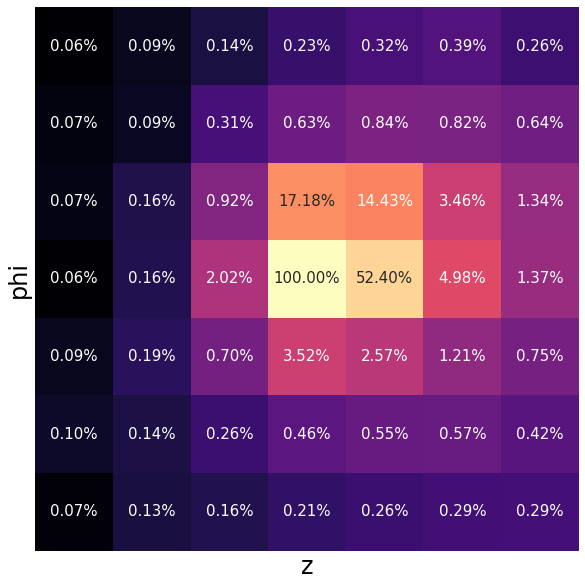

In [10]:
import seaborn as sns
plt.rcParams.update({'font.size': 24})


fig = plt.figure(figsize=(10, 10))

#M, N = 5, 10
#mat = np.random.rand(M, N)
#labels = np.random.choice(['X', '☀', '★', '♛'], size=(M, N))
ax = sns.heatmap(cluster_distribution_upstream, 
                 cmap="magma", 
                 cbar=False, 
                 norm=LogNorm(vmin=np.min(cluster_distribution_upstream), vmax=np.max(cluster_distribution_upstream)), 
                 annot=True, 
                 annot_kws={'fontsize': 15}, 
                 fmt='.2%',
                 square=True,
                 xticklabels=False,
                 yticklabels=False)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

In [11]:
print(np.around(cluster_distribution_upstream,2))

[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.01 0.01 0.01]
 [0.   0.   0.01 0.17 0.14 0.03 0.01]
 [0.   0.   0.02 1.   0.52 0.05 0.01]
 [0.   0.   0.01 0.04 0.03 0.01 0.01]
 [0.   0.   0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]
